## Table of Contents

#### 1.0 Introduction
        1.1 Load libraries and helper functions
        1.2 Load data
        1.3 File structure and content
#### 2.0 Exploratory Data Analysis (EDA)
        2.1 Cleaning dataset
            2.1.1 Understanding the dataset and variables
            2.1.2 Removing redundant variables
            2.1.3 Variable conversion to appropriate data type/ standardization
            2.1.4 Handling missing values
#### 3.0 Model building
        3.1 Feature selection
        3.2 Logistic regression
        3.3 Non GLM
            3.3.1 Logistic regression
            3.3.2 Decision Tree Model (CART)
            3.3.3 Random Forest
            3.3.4 Support Vector Machine
            3.3.5 Stacking Model
#### 4.0 Model assessment and accuracy check

### Loading helper functions and libraries

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from fancyimpute import IterativeImputer as MICE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from numpy import sort

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, roc_auc_score
import random

### Load dataset

In [2]:
train_data = pd.read_csv('Classification_40/exercise_40_train.csv')
test_data = pd.read_csv('Classification_40/exercise_40_test.csv')

### Understading the train_data

In [3]:
train_data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0,0.165254,18.060003,Wed,1.077380,-1.339233,-1.584341,0.0062%,0.220784,1.816481,...,-0.397427,0.909479,no,5.492487,NaN,10.255579,7.627730,0,yes,104.251338
1,1,2.441471,18.416307,Friday,1.482586,0.920817,-0.759931,0.0064%,1.192441,3.513950,...,0.656651,9.093466,no,3.346429,4.321172,NaN,10.505284,1,yes,101.230645
2,1,4.427278,19.188092,Thursday,0.145652,0.366093,0.709962,-8e-04%,0.952323,0.782974,...,2.059615,0.305170,no,4.456565,NaN,8.754572,7.810979,0,yes,109.345215
3,0,3.925235,19.901257,Tuesday,1.763602,-0.251926,-0.827461,-0.0057%,-0.520756,1.825586,...,0.899392,5.971782,no,4.100022,1.151085,NaN,9.178325,1,yes,103.021970
4,0,2.868802,22.202473,Sunday,3.405119,0.083162,1.381504,0.0109%,-0.732739,2.151990,...,3.003595,1.046096,yes,3.234033,2.074927,9.987006,11.702664,0,yes,92.925935


In [4]:
print(f"The train data has {train_data.shape[0]} rows and {train_data.shape[1]} colums")

The train data has 40000 rows and 101 colums


In [5]:
train_data.info

<bound method DataFrame.info of        y        x1         x2        x3        x4        x5        x6  \
0      0  0.165254  18.060003       Wed  1.077380 -1.339233 -1.584341   
1      1  2.441471  18.416307    Friday  1.482586  0.920817 -0.759931   
2      1  4.427278  19.188092  Thursday  0.145652  0.366093  0.709962   
3      0  3.925235  19.901257   Tuesday  1.763602 -0.251926 -0.827461   
4      0  2.868802  22.202473    Sunday  3.405119  0.083162  1.381504   
...   ..       ...        ...       ...       ...       ...       ...   
39995  0  1.593480  19.628352       Sun  0.794697 -0.825849  0.608774   
39996  0  1.708685  17.132638  Thursday -2.676659  1.153851  0.465905   
39997  0  1.704132  17.824399    Monday -0.581360       NaN  0.467339   
39998  0  3.963408  20.285597   Tuesday  0.430116  0.050189  1.821565   
39999  0  2.574164  16.442850  Thursday -1.166067 -1.198482  0.180549   

             x7        x8         x9  ...       x91       x92  x93       x94  \
0       0.0

There are missing values in the data

In [6]:
train_data.nunique(axis=0)

y           2
x1      39884
x2      39849
x3         14
x4      39849
        ...  
x96     33261
x97     39884
x98         2
x99         1
x100    39958
Length: 101, dtype: int64

## Data Exploration

Some of the variables have more than one categories. I will inspect to ensure there are no groups with same purpose in the categorical variables. If they are, I will regroup them.

In [7]:
train_data_new = train_data.copy() #creating a copy of the data

In [8]:
### Checking for labels with different words
train_data_new['x3'].unique() #only x3 is found

array(['Wed', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday',
       'Sat', 'Wednesday', 'Sun', 'Tue', 'Thur', 'Monday', 'Fri', 'Mon'],
      dtype=object)

In [9]:
#regrouping x3
train_data_new['x3']= np.where(train_data_new['x3'] =='Mon', 'Monday', train_data_new['x3'])
train_data_new['x3']= np.where(train_data_new['x3'] =='Tue', 'Tuesday', train_data_new['x3'])
train_data_new['x3']= np.where(train_data_new['x3'] =='Wed', 'Wednesday', train_data_new['x3'])
train_data_new['x3']= np.where(train_data_new['x3'] =='Thur', 'Thursday', train_data_new['x3'])
train_data_new['x3']= np.where(train_data_new['x3'] =='Fri', 'Friday', train_data_new['x3'])
train_data_new['x3']= np.where(train_data_new['x3'] =='Sat', 'Saturday', train_data_new['x3'])
train_data_new['x3']= np.where(train_data_new['x3'] =='Sun', 'Sunday', train_data_new['x3'])

In [10]:
train_data_new['x3'].unique() #confirm to be sure we have just the unique groups

array(['Wednesday', 'Friday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday',
       'Monday'], dtype=object)

In [11]:
#dropping redundant variables - these variables are objects type and have just one group

train_data_new.drop(['x39', 'x99'], axis=1, inplace=True)

In [12]:
#cleaning data entries, converting data types, and creating dummy variables for categorical variables
train_data_new['x3'] = train_data_new['x3'].astype('category').cat.codes
train_data_new['x93'] = train_data_new['x93'].astype('category').cat.codes
train_data_new['x24'] = train_data_new['x24'].astype('category').cat.codes
train_data_new['x31'] = train_data_new['x31'].astype('category').cat.codes
train_data_new['x60'] = train_data_new['x60'].astype('category').cat.codes
train_data_new['x65'] = train_data_new['x65'].astype('category').cat.codes
train_data_new['x77'] = train_data_new['x77'].astype('category').cat.codes
train_data_new['x33'] = train_data_new['x33'].astype('category').cat.codes

train_data_new['x24'].replace(-1, np.nan, inplace = True)
train_data_new['x77'].replace(-1, np.nan, inplace = True)
train_data_new['x33'].replace(-1, np.nan, inplace = True)

train_data_new['x7'] = train_data_new['x7'].str[:-1].astype(float)
train_data_new['x7'] = train_data_new['x7']/100
train_data_new['x19'] = train_data_new['x19'].replace({'\$':''}, regex = True).astype(float)

In [13]:
scaled_data = train_data_new.copy()

In [14]:

cat_vars = ['y','x3', 'x93', 'x24', 'x31', 'x60', 'x65', 'x77', 'x33', 'x98']
scaled_data.drop(cat_vars, axis=1, inplace=True)

In [15]:
#normalizing the data to ensure they are on the same scale

scaler = MinMaxScaler()
scaled_data[scaled_data.columns] = scaler.fit_transform(scaled_data[scaled_data.columns])
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()

,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,...,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
0,0.218099,0.324949,0.604098,0.378025,0.385348,0.611995,0.538724,0.234510,0.570048,0.601481,...,0.552880,0.138520,0.531437,0.449402,0.213423,0.536716,NaN,0.194496,0.358392,0.587994
1,0.348273,0.351595,0.643486,0.577772,0.455495,0.614443,0.618065,0.314769,0.600077,0.341477,...,0.566976,0.132536,0.631634,0.529275,0.620201,0.375747,0.771949,NaN,0.538799,0.519445
2,0.461838,0.409314,0.513527,0.528745,0.580566,0.526316,0.598458,0.185645,0.277296,0.456438,...,0.412889,NaN,0.663254,0.635585,0.183387,0.459015,NaN,0.051747,0.369880,0.703591
3,0.433127,0.462648,0.670803,0.474123,0.449749,0.466340,0.478174,0.234941,0.697282,0.467075,...,0.619475,NaN,0.548943,0.547669,0.465041,0.432272,0.553577,NaN,0.455606,0.560096
4,0.372711,0.634747,0.830370,0.503739,0.637706,0.669523,0.460865,0.250374,0.394892,0.409569,...,0.354382,NaN,0.547717,0.707116,0.220214,0.367317,0.617216,0.168954,0.613869,0.330985


In [16]:
cat_data = train_data_new[cat_vars]
cat_data.head()

,y,x3,x93,x24,x31,x60,x65,x77,x33,x98
0,0,6,0,0.0,0,1,2,3.0,5.0,0
1,1,0,0,1.0,0,0,0,3.0,42.0,1
2,1,4,0,1.0,0,11,3,5.0,43.0,0
3,0,5,0,1.0,0,11,3,4.0,23.0,1
4,0,3,1,1.0,1,4,3,6.0,32.0,0


In [17]:

train_data_new = pd.concat([cat_data, scaled_data], axis = 1)
train_data_new = train_data_new.reset_index(drop=True)

In [18]:
train_data_new.head()

,y,x3,x93,x24,x31,x60,x65,x77,x33,x98,...,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
0,0,6,0,0.0,0,1,2,3.0,5.0,0,...,0.552880,0.138520,0.531437,0.449402,0.213423,0.536716,NaN,0.194496,0.358392,0.587994
1,1,0,0,1.0,0,0,0,3.0,42.0,1,...,0.566976,0.132536,0.631634,0.529275,0.620201,0.375747,0.771949,NaN,0.538799,0.519445
2,1,4,0,1.0,0,11,3,5.0,43.0,0,...,0.412889,NaN,0.663254,0.635585,0.183387,0.459015,NaN,0.051747,0.369880,0.703591
3,0,5,0,1.0,0,11,3,4.0,23.0,1,...,0.619475,NaN,0.548943,0.547669,0.465041,0.432272,0.553577,NaN,0.455606,0.560096
4,0,3,1,1.0,1,4,3,6.0,32.0,0,...,0.354382,NaN,0.547717,0.707116,0.220214,0.367317,0.617216,0.168954,0.613869,0.330985


### Analyzing the target variable

In [19]:
train_data_new['y'].value_counts()

0    34197
1     5803
Name: y, dtype: int64

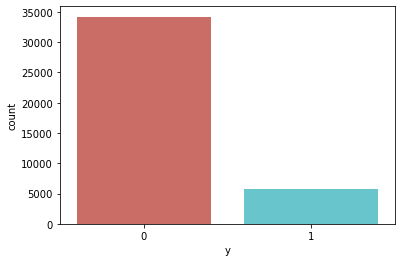

In [20]:
sns. countplot(x='y', data=train_data_new, palette='hls')
plt. show()

There is a case of imbalance between the two class labels. There is a huge difference between class 0 and 1.

### Handling imbalances
<p>Method 1: Create a dataset by randomly selecting observations from the majority class having the size of the minority class.</p>
<p>Method 2: Use the orignal data set </p>

In [21]:
########################################################################################
#####                Fixing randomness for reproduciblitity                       ######
########################################################################################

random_state = random.sample([i for i in range(0,100)], 1)[0] ## comment out line if you want results to be fixed
random_state

2

In [22]:

def createBalancedData(df, class_label):
  class_0 = df.query(f"{class_label} == 0")
  class_1 = df.query(f"{class_label} == 1")
  class_0 = class_0.sample(n = class_1.shape[0], random_state=1)
  res = pd.concat([class_0, class_1])
  res = shuffle(res, random_state=1)
  return(res)

def sampleImbalancedData(df, class_label, frac):
  class_0 = df.query(f"{class_label} == 0")
  class_1 = df.query(f"{class_label} == 1")
  class_0_X = class_0.drop("y", axis = 1)
  class_1_X = class_1.drop("y", axis = 1)
  X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(class_0_X, class_0.y, train_size= frac, random_state=random_state, shuffle=True)
  X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(class_1_X, class_1.y, train_size= frac, random_state=random_state, shuffle=True)
  X_train = pd.concat([X_0_train, X_1_train])
  y_train = pd.concat([y_0_train, y_1_train])
  X_train, y_train = shuffle(X_train, y_train, random_state=1)
  X_test = pd.concat([X_0_test, X_1_test])
  y_test = pd.concat([y_0_test, y_1_test])
  X_test, y_test = shuffle(X_test, y_test, random_state=1)
  return(tuple([X_train, X_test, y_train, y_test]))

In [23]:
dataset1 = createBalancedData(train_data_new, 'y') #dataset1 using method 1

In [24]:
dataset1.shape

(11606, 99)

### Analyzing relationship between independent variables and target variable

In [25]:
cor = dataset1.corr()
cor_target = cor['y'].sort_values(ascending = False)
cor_target.head(10) #top 10 stronger relationships

y      1.000000
x68    0.114633
x52    0.111470
x70    0.075798
x28    0.074489
x95    0.063926
x44    0.057630
x81    0.055880
x32    0.043259
x27    0.033820
Name: y, dtype: float64

## Handling missing values

In [26]:
#create train/test data from dataset 1 - 30% of the dataset are randomly selected to be in test data
X_dataset1 = dataset1.loc[:, dataset1.columns != 'y']
y_dataset1 = dataset1.loc[:, dataset1.columns == 'y']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_dataset1, y_dataset1, test_size = 0.30, random_state=200)

In [27]:
X_train1.shape

(8124, 98)

In [28]:
X_test1.shape

(3482, 98)

In [29]:
y_train1.value_counts()

y
1    4089
0    4035
dtype: int64

In [30]:
#evaluating missing data
missing_X_train1 = X_train1.isnull()
missing_X_train1.head()

,x3,x93,x24,x31,x60,x65,x77,x33,x98,x1,...,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
4963,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19416,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14755,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2574,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
27716,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [31]:
# I will drop variables having more than 40% as missing observations for both train and test data
def na_filter(df, threshold): #only select variables that pass the threshold
    na = df.isna().sum()
    col_pass = []
    for i in na.keys():
        if na[i]/df.shape[0] < threshold:
            col_pass.append(i)
    return col_pass

In [32]:
#count number of missing values in each variable
for column in missing_X_train1.columns.values.tolist():
    print(column)
    print (missing_X_train1[column].value_counts())
    print("")  

x3
False    8124
Name: x3, dtype: int64

x93
False    8124
Name: x93, dtype: int64

x24
False    7330
True      794
Name: x24, dtype: int64

x31
False    8124
Name: x31, dtype: int64

x60
False    8124
Name: x60, dtype: int64

x65
False    8124
Name: x65, dtype: int64

x77
False    6309
True     1815
Name: x77, dtype: int64

x33
False    6670
True     1454
Name: x33, dtype: int64

x98
False    8124
Name: x98, dtype: int64

x1
False    8124
Name: x1, dtype: int64

x2
False    8124
Name: x2, dtype: int64

x4
False    8124
Name: x4, dtype: int64

x5
False    7627
True      497
Name: x5, dtype: int64

x6
False    8124
Name: x6, dtype: int64

x7
False    8124
Name: x7, dtype: int64

x8
False    8124
Name: x8, dtype: int64

x9
False    8124
Name: x9, dtype: int64

x10
False    8124
Name: x10, dtype: int64

x11
False    7089
True     1035
Name: x11, dtype: int64

x12
False    8124
Name: x12, dtype: int64

x13
False    8124
Name: x13, dtype: int64

x14
False    6094
True     2030
Name: x14, dt

In [33]:
X_train1_new = X_train1[na_filter(df = X_train1, threshold = 0.4)]
X_train1_new.shape


(8124, 93)

In [34]:
headers = X_train1_new.columns

In [35]:
#Missing values imputation using MICE for both train and test data
trans = MICE(verbose=False, max_iter=1000) #calling MICE
fitted = trans.fit(X_train1_new) #fit using train data

In [36]:
X_train1_cleaned = fitted.transform(X_train1_new) #transform to impute the missing values
X_train1_cleaned = pd.DataFrame(X_train1_cleaned)

In [37]:
#resetting index for y_train data. the MICE reset index for X_train
y_train1_cleaned = y_train1.reset_index(drop=True)

In [38]:
#checking to ensure all missing values are being taken care of
sum(X_train1_cleaned.apply(lambda x: sum(x.isnull().values), axis = 1)>0)

0

Yippy! no more missing values

In [39]:
#now for test data
X_test1_new = X_test1[na_filter(df = X_test1, threshold = 0.4)]
X_test1_new.shape

(3482, 93)

In [40]:
X_test1_cleaned = fitted.transform(X_test1_new) #transform to impute the missing values
X_test1_cleaned = pd.DataFrame(X_test1_cleaned)

In [41]:
y_test1_cleaned = y_test1.reset_index(drop=True)

In [42]:
sum(X_test1_cleaned.apply(lambda x: sum(x.isnull().values), axis = 1)>0)

0

In [43]:
X_test1_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.0,0.0,0.497172,0.0,5.0,4.0,6.0,9.0,0.0,0.303613,...,0.518847,0.477190,0.520658,0.323275,0.175812,0.523306,0.538661,0.315181,0.535702,0.395739
1,1.0,0.0,1.000000,0.0,5.0,4.0,2.0,30.0,1.0,0.505576,...,0.423578,0.008572,0.509425,0.566636,0.666788,0.393331,0.487598,0.182426,0.408275,0.478585
2,1.0,0.0,0.000000,0.0,5.0,2.0,5.0,41.0,1.0,0.260680,...,0.488110,-0.162305,0.542898,0.588622,0.374506,0.454178,0.426822,0.635740,0.489681,0.450520
3,4.0,0.0,0.000000,0.0,8.0,1.0,6.0,31.0,1.0,0.376983,...,0.576619,0.103328,0.588961,0.574636,0.134713,0.305433,0.543049,0.151029,0.319485,0.373304
4,6.0,0.0,0.000000,0.0,6.0,3.0,2.0,4.0,0.0,0.519712,...,0.205716,0.072960,0.677548,0.471703,0.211608,0.521656,0.530401,0.271571,0.277880,0.665002


In [44]:
X_train1_cleaned.columns = headers #insert headers back after missing values imputation
X_test1_cleaned.columns = headers

#round the impuation for categorical variables to the nearest int
X_train1_cleaned['x77'] = round(X_train1_cleaned['x77']) 
X_train1_cleaned['x33'] = round(X_train1_cleaned['x33'])

X_test1_cleaned['x77'] = round(X_test1_cleaned['x77']) 
X_test1_cleaned['x33'] = round(X_test1_cleaned['x33'])

In [45]:
X_train1_cleaned.head()

,x3,x93,x24,x31,x60,x65,x77,x33,x98,x1,...,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,16.0,0.0,0.318712,...,0.547553,0.083520,0.804357,0.367009,0.140704,0.430856,0.367333,0.383386,0.582673,0.614805
1,4.0,0.0,0.0,0.0,5.0,2.0,3.0,33.0,0.0,0.268395,...,0.500974,0.061040,0.749989,0.377340,0.161449,0.562072,0.319213,0.043887,0.715081,0.351291
2,2.0,0.0,0.0,0.0,4.0,0.0,3.0,24.0,1.0,0.508570,...,0.484393,0.058550,0.699350,0.366750,0.159852,0.575146,0.536975,0.022004,0.405238,0.600695
3,5.0,0.0,1.0,0.0,4.0,0.0,0.0,42.0,1.0,0.271501,...,0.428800,-0.034599,0.539644,0.536913,0.357725,0.483804,0.616369,0.126730,0.387822,0.493411
4,3.0,0.0,0.0,0.0,4.0,4.0,3.0,24.0,1.0,0.310770,...,0.111301,0.153830,0.376178,0.537156,0.572267,0.406579,0.528649,0.026409,0.488876,0.503549


In [46]:
X_test1_cleaned.head()

,x3,x93,x24,x31,x60,x65,x77,x33,x98,x1,...,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
0,0.0,0.0,0.497172,0.0,5.0,4.0,6.0,9.0,0.0,0.303613,...,0.518847,0.477190,0.520658,0.323275,0.175812,0.523306,0.538661,0.315181,0.535702,0.395739
1,1.0,0.0,1.000000,0.0,5.0,4.0,2.0,30.0,1.0,0.505576,...,0.423578,0.008572,0.509425,0.566636,0.666788,0.393331,0.487598,0.182426,0.408275,0.478585
2,1.0,0.0,0.000000,0.0,5.0,2.0,5.0,41.0,1.0,0.260680,...,0.488110,-0.162305,0.542898,0.588622,0.374506,0.454178,0.426822,0.635740,0.489681,0.450520
3,4.0,0.0,0.000000,0.0,8.0,1.0,6.0,31.0,1.0,0.376983,...,0.576619,0.103328,0.588961,0.574636,0.134713,0.305433,0.543049,0.151029,0.319485,0.373304
4,6.0,0.0,0.000000,0.0,6.0,3.0,2.0,4.0,0.0,0.519712,...,0.205716,0.072960,0.677548,0.471703,0.211608,0.521656,0.530401,0.271571,0.277880,0.665002


## Model development

In [47]:
#######################################################################
#####    Logistic Regression model for balanced dataset         #######
#######################################################################

In [48]:
X1 = X_train1_cleaned
y1 = y_train1_cleaned

### Feature selection using Recursive Feature Elimination

In [49]:
logit_reg1 = LogisticRegression(max_iter = 2000)
rfe = RFE(logit_reg1)
rfe = rfe.fit(X1, y1.values.ravel())

In [50]:
print(rfe.support_)
print((rfe.ranking_))

[False  True False  True False False False False False False  True False
 False False  True  True False False False  True  True False  True  True
  True  True  True  True False False False False False False  True False
  True  True  True  True  True  True False  True False False False  True
  True False False  True  True False  True False  True False  True  True
  True  True False False  True False False False False  True  True  True
 False  True False False False  True  True  True  True  True False False
  True  True  True False  True False False False  True]
[30  1 44  1 40 37 45 47 17 23  1 28 12 27  1  1 48 20 35  1  1 11  1  1
  1  1  1  1 10 32  9 24 18 43  1 41  1  1  1  1  1  1 19  1 31 26  2  1
  1 14 22  1  1  4  1 39  1 46  1  1  1  1 15  8  1 21  5 16 29  1  1  1
 38  1 25  7 36  1  1  1  1  1 34 33  1  1  1 13  1  6 42  3  1]


In [51]:
features_index = rfe.get_support(1) #the most important features
features_selected = X1.columns[features_index]

print('The number of features selected is: ', rfe.n_features_)

The number of features selected is:  46


### Implementing the model

In [52]:
X_train_model1 = X1[features_selected]
y_train_model1 = y1


In [53]:
logit_model1 = sm.Logit(y_train_model1, X_train_model1)
result_model1 = logit_model1.fit()
print(result_model1.summary2())

Optimization terminated successfully.
         Current function value: 0.581699
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.161    
Dependent Variable: y                AIC:              9543.4511
Date:               2022-06-23 11:43 BIC:              9865.5697
No. Observations:   8124             Log-Likelihood:   -4725.7  
Df Model:           45               LL-Null:          -5630.9  
Df Residuals:       8078             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
------------------------------------------------------------------
x93     -0.8585     0.1087    -7.9009   0.0000   -1.0715   -0.6456
x31     -0.5159     0.0924    -5.5848   0.0000   -0.6969   -0.3348
x2 

### Fitting model for balanced data

In [54]:
logreg1 = LogisticRegression(max_iter = 1000, random_state=0)
logreg1.fit(X_train_model1, y_train_model1.values.ravel())

LogisticRegression(max_iter=1000, random_state=0)

In [55]:
logreg1.coef_

array([[-0.83196062, -0.51646117,  0.81049443, -6.01589563,  0.80853532,
         0.3379647 ,  0.60462238, -0.39133371, -1.40262238,  0.64003325,
        -1.5382891 , -0.84073428,  0.29870701, -0.70175899,  0.81388075,
        -0.42704592,  0.41139989, -2.24811545,  0.46210708, -0.41493174,
         0.37065263, -0.38009717, -1.93551969,  0.38933839,  0.64393388,
         0.60088466,  0.30643003,  1.51137029, -0.3444451 ,  0.3693654 ,
        -0.2011067 ,  0.27986552, -1.34495244,  0.23332877, -0.71807796,
        -0.28121736, -1.13775243,  0.34419101, -0.3656269 ,  0.79808312,
         0.7469437 , -1.12864358,  0.38766601, -0.49711603, -0.63530784,
         0.88576713]])

### Predicting using test data

In [56]:
X_test_model1 = X_test1_cleaned[features_selected]

In [57]:
y_pred_model1 = logreg1.predict(X_test_model1)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg1.score(X_test_model1, y_test1_cleaned)))

Accuracy of logistic regression classifier on test set: 0.68581


In [58]:
confusion_matrix_model1 = confusion_matrix(y_test1_cleaned, y_pred_model1)
print(confusion_matrix_model1)

[[1209  559]
 [ 535 1179]]


In [59]:
print(classification_report(y_test1_cleaned, y_pred_model1))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69      1768
           1       0.68      0.69      0.68      1714

    accuracy                           0.69      3482
   macro avg       0.69      0.69      0.69      3482
weighted avg       0.69      0.69      0.69      3482



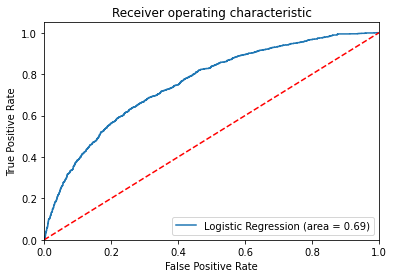

The AUC score is:  0.685844086759558


In [60]:
logreg1_auc = roc_auc_score(y_test1_cleaned, y_pred_model1)
fpr, tpr, thresholds = roc_curve(y_test1_cleaned, logreg1.predict_proba(X_test_model1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logreg1_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('The AUC score is: ', logreg1_auc)

 ## Decision Tree Model [CART] MODEL

Decision tree out-of-sample accuracy is 0.6794945433658817 


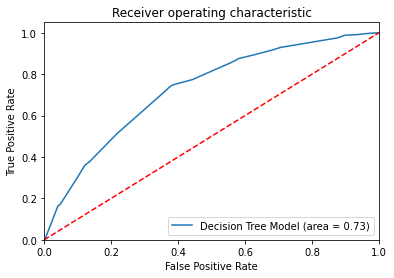

The AUC score is:  0.7264956348305411


In [61]:
# ###############################################################
# #####          Decision Tree Model [CART] MODEL         #######
######                Balanced dataset
# ###############################################################

from sklearn.tree import DecisionTreeClassifier

#max_depth - this is set to 5, meaning I want the split to stop at 5 nodes. 
#The reason is just to stop the splitting at earlier time

X_train, y_train, X_test, y_test = X_train1_cleaned, y_train1_cleaned, X_test1_cleaned, y_test1_cleaned
DTclf = DecisionTreeClassifier(max_depth = 5, random_state=random_state).fit(X_train, y_train)

print("Decision tree out-of-sample accuracy is {} ".format(DTclf.score(X_test, y_test)))
y_pred = DTclf.predict_proba(X_test)
y_pred_new = y_pred[:,1]
#y_pred_new.reshape((3830,1))

DTclf_auc = roc_auc_score(y_test, y_pred_new)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_new)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Model (area = %0.2f)' % DTclf_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('The AUC score is: ', DTclf_auc)

 ## Random Forest Model 

/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/almedida/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

Random Forest accuracy is 0.6961516369902355 


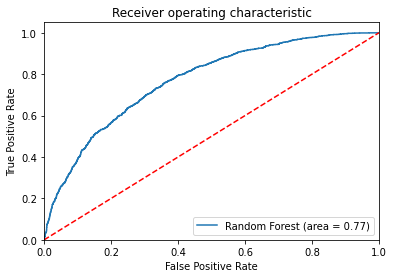

The AUC score is:  0.7694294260204755


In [62]:
#######################################################################
#####                  Random Forest Model  for Balanced                    #######
#######################################################################
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 4)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)

min_samples_split = [5, 10]

min_samples_leaf = [2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

X_train, y_train, X_test, y_test = X_train1_cleaned, y_train1_cleaned, X_test1_cleaned, y_test1_cleaned
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

RFclf = RandomForestClassifier()

RFclf = RandomizedSearchCV(estimator = RFclf, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=0, random_state=random_state, n_jobs = -1).fit(X_train, y_train)


print("Random Forest accuracy is {} ".format(RFclf.score(X_test, y_test)))
y_pred = RFclf.predict_proba(X_test)[:,1]

RFclf_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % RFclf_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('The AUC score is: ', RFclf_auc)

In [110]:
RFclf.feature_importances_

AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importances_'

## Gradient Boosted Tree Model 

In [81]:
#######################################################################
#####                 Gradient Boosted Tree Model for Balanced            #######
#######################################################################

from sklearn.ensemble import GradientBoostingClassifier


max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(5)

random_grid = {
    "n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 4)],
    "max_depth": max_depth,
    "min_samples_split": [5, 10],
    "learning_rate": [0.01],
    #"loss": ["squared_error"],
}

X_train, y_train, X_test, y_test = X_train1_cleaned, y_train1_cleaned, X_test1_cleaned, y_test1_cleaned
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

GBRclf = RandomizedSearchCV(estimator = GradientBoostingClassifier(), param_distributions = random_grid,
                            cv = 5, verbose=2, random_state=random_state, n_jobs = -1).fit(X_train, y_train)


print("Gradient boosted tree accuracy R-squared is {} ".format(GBRclf.score(X_test, y_test)))



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.01, max_depth=110, min_samples_split=10, n_estimators=200; total time= 3.0min
[CV] END learning_rate=0.01, max_depth=110, min_samples_split=10, n_estimators=2000; total time=122.8min
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=5, n_estimators=800; total time=69.2min
[CV] END learning_rate=0.01, max_depth=110, min_samples_split=10, n_estimators=800; total time=14.0min
[CV] END learning_rate=0.01, max_depth=110, min_samples_split=5, n_estimators=200; total time= 4.0min
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=5, n_estimators=200; total time= 1.7min
[CV] END learning_rate=0.01, max_depth=110, min_samples_split=10, n_estimators=2000; total time=122.6min
[CV] END learning_rate=0.01, max_depth=10, min_samples_split=5, n_estimators=800; total time=69.2min
[CV] END learning_rate=0.01, max_depth=110, min_samples_split=10, n_estimators=800; total time=13.9min
[CV] END learni

ValueError: y should be a 1d array, got an array of shape (3482, 2) instead.

Gradient boosted tree accuracy R-squared is 0.7024698449167145 


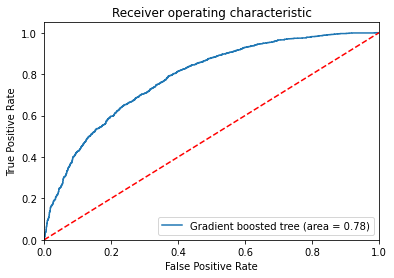

The AUC score is:  0.7845801411849186


In [84]:
print("Gradient boosted tree accuracy R-squared is {} ".format(GBRclf.score(X_test, y_test)))

y_pred = GBRclf.predict_proba(X_test)[:,1]

GBRclf_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Gradient boosted tree (area = %0.2f)' % GBRclf_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('The AUC score is: ', GBRclf_auc)

## Support Vector Classifier

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..C=16106.296163848498, gamma=0.0009021323627235025; total time= 3.6min
[CV] END ....C=22278.684844388194, gamma=0.03918532752440887; total time= 1.1min
[CV] END ...C=1332.854854033959, gamma=0.0001288888061464475; total time=  50.4s
[CV] END ...C=2362.3524870884025, gamma=0.000837324269595626; total time=  56.1s
[CV] END .....C=81728.03485573441, gamma=0.08525226567810473; total time=  46.7s
[CV] END .....C=81728.03485573441, gamma=0.08525226567810473; total time=  47.5s
[CV] END .....C=81728.03485573441, gamma=0.08525226567810473; total time=  47.1s
[CV] END ..C=2530.9449707074955, gamma=0.0005150951393160728; total time=  48.6s
[CV] END ....C=11337.186351688406, gamma=0.03471965496622569; total time= 1.2min
[CV] END ...C=29546.274551122227, gamma=0.039693116999240226; total time=  59.5s
[CV] END ...C=29546.274551122227, gamma=0.039693116999240226; total time=  59.6s
[CV] END .....C=96660.43784682635, gamma=0.04058

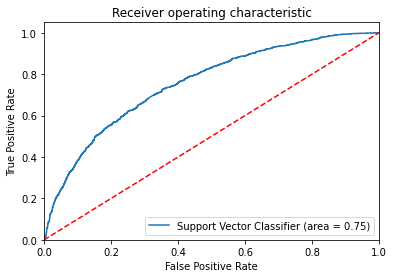

The AUC score is:  0.7539869955701515


In [83]:
#######################################################################
#####      Support Vector Classifier for balanced data          #######
#######################################################################

from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform

param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
    
}


X_train, y_train, X_test, y_test = X_train1_cleaned, y_train1_cleaned, X_test1_cleaned, y_test1_cleaned
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
SVCclf = RandomizedSearchCV(SVC(kernel="rbf", class_weight="balanced", probability = True), param_grid, n_iter=10, 
                           verbose=2, n_jobs= -1).fit(X_train, y_train)

print("Support Vector Classifier accuracy is {} ".format(SVCclf.score(X_test, y_test)))
y_pred = SVCclf.predict_proba(X_test)[:,1]

SVCclf_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Classifier (area = %0.2f)' % SVCclf_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('The AUC score is: ', SVCclf_auc)

## Stacked Classifier 

[CV] END ....C=11337.186351688406, gamma=0.03471965496622569; total time= 1.2min
[CV] END ..C=16106.296163848498, gamma=0.0009021323627235025; total time= 3.3min
[CV] END ...C=1332.854854033959, gamma=0.0001288888061464475; total time=  50.7s
[CV] END ..C=36749.349209838794, gamma=0.0022122271049991897; total time=12.6min
[CV] END ....C=11337.186351688406, gamma=0.03471965496622569; total time= 1.2min
[CV] END ...C=29546.274551122227, gamma=0.039693116999240226; total time=  59.9s
[CV] END ...C=29546.274551122227, gamma=0.039693116999240226; total time=  59.0s
[CV] END .....C=96660.43784682635, gamma=0.04058936323145782; total time= 1.0min
[CV] END ....C=22278.684844388194, gamma=0.03918532752440887; total time= 1.2min
[CV] END ..C=36749.349209838794, gamma=0.0022122271049991897; total time=12.8min
[CV] END ..C=16106.296163848498, gamma=0.0009021323627235025; total time= 3.4min
[CV] END ....C=22278.684844388194, gamma=0.03918532752440887; total time= 1.1min
[CV] END ...C=1332.854854033

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.2min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | ela

[CV] END ..C=16106.296163848498, gamma=0.0009021323627235025; total time= 3.3min
[CV] END .....C=96660.43784682635, gamma=0.04058936323145782; total time= 1.1min
[CV] END ...C=1332.854854033959, gamma=0.0001288888061464475; total time=  50.6s
[CV] END ..C=36749.349209838794, gamma=0.0022122271049991897; total time=12.8min


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.0min finished


Stacked Regressor accuracy is 0.7050545663411832 


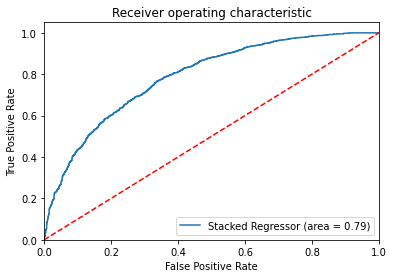

The AUC score is:  0.7879648964872727
[CV] END ....C=11337.186351688406, gamma=0.03471965496622569; total time= 1.2min
[CV] END ...C=29546.274551122227, gamma=0.039693116999240226; total time= 1.0min
[CV] END .....C=96660.43784682635, gamma=0.04058936323145782; total time=  58.4s
[CV] END .....C=96660.43784682635, gamma=0.04058936323145782; total time= 1.1min
[CV] END ....C=22278.684844388194, gamma=0.03918532752440887; total time= 1.2min
[CV] END ..C=36749.349209838794, gamma=0.0022122271049991897; total time=13.0min


In [85]:
#######################################################################
#####                  Stacked Classifier                       #######
#######################################################################

from sklearn.ensemble import StackingClassifier
#from sklearn.linear_model import RidgeCV

estimators = [
    ("Decision Tree", DTclf),
    ("Random Forest", RFclf.best_estimator_),
    ("Gradient Boosting", GBRclf.best_estimator_),
    ("Support Vector Machine", SVCclf.best_estimator_)
    
]

X_train, y_train, X_test, y_test = X_train1_cleaned, y_train1_cleaned, X_test1_cleaned, y_test1_cleaned
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

stacking_classifier = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression(), verbose=2, 
                                         n_jobs = -1).fit(X_train, y_train)


print("Stacked Regressor accuracy is {} ".format(stacking_classifier.score(X_test, y_test)))
y_pred = stacking_classifier.predict_proba(X_test)[:,1]

stacking_classifier_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Stacked Regressor (area = %0.2f)' % stacking_classifier_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('The AUC score is: ', stacking_classifier_auc)

## Make Predictions using test data (10k)  

In [86]:
#######################################################################
######        Make Predictions using test data (10k)            #######
#######################################################################

In [87]:
test_data_new = test_data.copy() #creating a copy of the data

In [88]:
### Checking for labels with different words
test_data_new.nunique()

x1      9993
x2      9993
x3        14
x4      9990
x5      9391
        ... 
x96     8367
x97     9989
x98        2
x99        1
x100    9992
Length: 100, dtype: int64

In [89]:
#regrouping x3
test_data_new['x3']= np.where(test_data_new['x3'] =='Mon', 'Monday', test_data_new['x3'])
test_data_new['x3']= np.where(test_data_new['x3'] =='Tue', 'Tuesday', test_data_new['x3'])
test_data_new['x3']= np.where(test_data_new['x3'] =='Wed', 'Wednesday', test_data_new['x3'])
test_data_new['x3']= np.where(test_data_new['x3'] =='Thur', 'Thursday', test_data_new['x3'])
test_data_new['x3']= np.where(test_data_new['x3'] =='Fri', 'Friday', test_data_new['x3'])
test_data_new['x3']= np.where(test_data_new['x3'] =='Sat', 'Saturday', test_data_new['x3'])
test_data_new['x3']= np.where(test_data_new['x3'] =='Sun', 'Sunday', test_data_new['x3'])

In [90]:
test_data_new['x3'].unique() #confirm to be sure we have just the unique groups

array(['Wednesday', 'Friday', 'Saturday', 'Tuesday', 'Monday', 'Sunday',
       'Thursday'], dtype=object)

In [91]:
#dropping redundant variables - these variables are objects type and have just one group

test_data_new.drop(['x39', 'x99'], axis=1, inplace=True)

In [92]:
#cleaning data entries, converting data types, and creating dummy variables for categorical variables
test_data_new['x3'] = test_data_new['x3'].astype('category').cat.codes
test_data_new['x93'] = test_data_new['x93'].astype('category').cat.codes
test_data_new['x24'] = test_data_new['x24'].astype('category').cat.codes
test_data_new['x31'] = test_data_new['x31'].astype('category').cat.codes
test_data_new['x60'] = test_data_new['x60'].astype('category').cat.codes
test_data_new['x65'] = test_data_new['x65'].astype('category').cat.codes
test_data_new['x77'] = test_data_new['x77'].astype('category').cat.codes
test_data_new['x33'] = test_data_new['x33'].astype('category').cat.codes

test_data_new['x24'].replace(-1, np.nan, inplace = True)
test_data_new['x77'].replace(-1, np.nan, inplace = True)
test_data_new['x33'].replace(-1, np.nan, inplace = True)

test_data_new['x7'] = test_data_new['x7'].str[:-1].astype(float)
test_data_new['x7'] = test_data_new['x7']/100
test_data_new['x19'] = test_data_new['x19'].replace({'\$':''}, regex = True).astype(float)

In [93]:
scaled_test_data = test_data_new.copy()

In [94]:

cat_vars = ['x3', 'x93', 'x24', 'x31', 'x60', 'x65', 'x77', 'x33', 'x98']
scaled_test_data.drop(cat_vars, axis=1, inplace=True)

In [95]:
#normalizing the data to ensure they are on the same scale

scaler = MinMaxScaler()
scaled_test_data[scaled_test_data.columns] = scaler.fit_transform(scaled_test_data[scaled_test_data.columns])
scaled_test_data = pd.DataFrame(scaled_test_data)
scaled_test_data.head()

,x1,x2,x4,x5,x6,x7,x8,x9,x10,x11,...,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
0,0.513806,0.559065,0.750128,0.303766,0.459339,0.543839,0.217928,0.184402,0.393085,0.512522,...,0.828917,0.193444,0.845391,NaN,0.849079,0.381769,0.539989,0.529644,0.313248,0.349206
1,0.263467,0.458554,0.703755,0.414957,0.393783,0.517773,0.554189,0.181163,0.290836,0.550513,...,0.468583,0.003788,0.730393,0.429628,0.573735,0.491134,NaN,0.272524,0.650708,0.470875
2,0.530446,0.414306,0.616578,0.332265,0.772286,0.421801,0.407115,0.437837,0.452660,0.522808,...,0.632632,NaN,0.683273,0.611151,0.742714,0.286592,0.362622,0.390470,0.592697,0.373614
3,0.441573,0.381415,0.488072,0.241797,0.456334,0.238152,0.270700,0.231637,0.451080,0.321863,...,0.487766,0.429473,0.626421,0.570167,0.400577,0.338352,0.626461,0.232169,0.523110,0.512847
4,0.448003,0.533779,0.728215,0.419323,0.463875,0.648104,0.518880,0.297076,0.368834,0.243195,...,0.541845,0.138816,0.368022,0.430886,0.388649,0.472259,NaN,0.130765,0.662908,0.566741


In [96]:
cat_data = test_data_new[cat_vars]
cat_data.head()

,x3,x93,x24,x31,x60,x65,x77,x33,x98
0,6,0,NaN,0,8,4,3.0,9.0,0
1,0,1,0.0,1,5,0,2.0,33.0,1
2,2,0,1.0,0,4,4,NaN,NaN,0
3,5,0,0.0,0,5,3,5.0,24.0,1
4,1,1,0.0,1,4,4,2.0,10.0,1


In [97]:

test_data_new = pd.concat([cat_data, scaled_test_data], axis = 1)
test_data_new = test_data_new.reset_index(drop=True) #resetting the index

In [98]:
test_data_new.head()

,x3,x93,x24,x31,x60,x65,x77,x33,x98,x1,...,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
0,6,0,NaN,0,8,4,3.0,9.0,0,0.513806,...,0.828917,0.193444,0.845391,NaN,0.849079,0.381769,0.539989,0.529644,0.313248,0.349206
1,0,1,0.0,1,5,0,2.0,33.0,1,0.263467,...,0.468583,0.003788,0.730393,0.429628,0.573735,0.491134,NaN,0.272524,0.650708,0.470875
2,2,0,1.0,0,4,4,NaN,NaN,0,0.530446,...,0.632632,NaN,0.683273,0.611151,0.742714,0.286592,0.362622,0.390470,0.592697,0.373614
3,5,0,0.0,0,5,3,5.0,24.0,1,0.441573,...,0.487766,0.429473,0.626421,0.570167,0.400577,0.338352,0.626461,0.232169,0.523110,0.512847
4,1,1,0.0,1,4,4,2.0,10.0,1,0.448003,...,0.541845,0.138816,0.368022,0.430886,0.388649,0.472259,NaN,0.130765,0.662908,0.566741


## Handling missing values

In [99]:
#dropping variables that have more than 40% of the observations as missing values
test_data_cleaned = test_data_new[na_filter(df = test_data_new, threshold = 0.4)]
test_data_cleaned.shape


(10000, 93)

In [100]:
headers = test_data_cleaned.columns

In [101]:
#using the model trained on the training dataset to predict the missing values in order to avoid data leakage
test_data_ready = fitted.transform(test_data_cleaned) #transform to impute the missing values
test_data_ready = pd.DataFrame(test_data_ready)

In [102]:
#checking to ensure all missing values are being taken care of
sum(test_data_ready.apply(lambda x: sum(x.isnull().values), axis = 1)>0)

0

In [103]:
test_data_ready.columns = headers #insert headers back after missing values imputation
test_data_ready.columns = headers

#round the impuation for categorical variables to the nearest int
test_data_ready['x77'] = round(test_data_ready['x77']) 
test_data_ready['x33'] = round(test_data_ready['x33'])
test_data_ready['x24'] = round(test_data_ready['x24'])

test_data_ready['x77'] = round(test_data_ready['x77']) 
test_data_ready['x33'] = round(test_data_ready['x33'])
test_data_ready['x24'] = round(test_data_ready['x24'])

In [104]:
test_data_ready.head()

,x3,x93,x24,x31,x60,x65,x77,x33,x98,x1,...,x88,x89,x90,x91,x92,x94,x95,x96,x97,x100
0,6.0,0.0,0.0,0.0,8.0,4.0,3.0,9.0,0.0,0.513806,...,0.828917,0.193444,0.845391,0.555222,0.849079,0.381769,0.539989,0.529644,0.313248,0.349206
1,0.0,1.0,0.0,1.0,5.0,0.0,2.0,33.0,1.0,0.263467,...,0.468583,0.003788,0.730393,0.429628,0.573735,0.491134,0.639902,0.272524,0.650708,0.470875
2,2.0,0.0,1.0,0.0,4.0,4.0,3.0,24.0,0.0,0.530446,...,0.632632,-0.041877,0.683273,0.611151,0.742714,0.286592,0.362622,0.390470,0.592697,0.373614
3,5.0,0.0,0.0,0.0,5.0,3.0,5.0,24.0,1.0,0.441573,...,0.487766,0.429473,0.626421,0.570167,0.400577,0.338352,0.626461,0.232169,0.523110,0.512847
4,1.0,1.0,0.0,1.0,4.0,4.0,2.0,10.0,1.0,0.448003,...,0.541845,0.138816,0.368022,0.430886,0.388649,0.472259,0.644531,0.130765,0.662908,0.566741


## Making predictions using test data

In [105]:
##################################################################
##
##  Logistic Regression model trained on Balanced dataset
##
##################################################################

test_model = test_data_ready[features_selected]




In [106]:
test_model.shape

(10000, 46)

In [107]:
y_pred_logreg = logreg1.predict_proba(test_model)
save_prob = pd.DataFrame(y_pred_logreg[:,1])
save_prob.to_csv('glmresults2.csv', index = False, header = False )

In [108]:
##################################################################
##
##  Stacked model trained on Balanced dataset
##
##################################################################

In [109]:
y_pred_stack = stacking_classifier.predict_proba(test_data_ready)[:,1]
save_stack_prob = pd.DataFrame(y_pred_stack)
save_stack_prob.to_csv('nonglmresults2.csv', index = False, header = False )

#### Reported by: Oluwashola Lawal
#### June 13, 2022.